<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/da_kvanlagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beschreibung Datensatz

Die Kehrichtverbrennung ist die Verbrennung der atmosphärisch brennbaren Anteile von Abfall zum Zwecke der Volumenreduzierung des Abfalls unter Nutzung der enthaltenen Energie.Der schweizerische KVA-Park umfasst im Jahr 2017 30 Anlagen mit Kapazitäten zwischen 30‘000 und 230‘000 Jahrestonnen. Die Gesamtmenge an brennbaren Abfällen aus der Schweiz und dem Ausland, die in KVA thermisch verwertet werden, beläuft sich auf ca. 4 Mio. Tonnen. Die bei der Verbrennung anfallende Wärme wird für die Produktion von Strom oder für den Betrieb von Fernwärmenetzen bzw. für Prozesswärme für Industrieanlagen eingesetzt. Im Jahr 2017 produzierten die 30 KVA eine bisherige Rekordmenge an Energie von gesamthaft 4'036 Gigawattstunden (GWh) Wärme und 2338 GWh Strom. Sie tragen damit rund 2.5 Prozent zur Deckung des schweizerischen Gesamtenergiebedarfs bzw. knapp 4 Prozent zur schweizerischen Stromproduktion bei. Die Geofachdaten KVA dokumentieren den aktuellen Stand verwerteter Abfallmengen und der nach aussen gelieferten Energiemengen. Sämtliche Informationen basieren auf den Auskünften der Anlagenbetreibenden. Die Angaben dienen als Informationsmaterial für die Öffentlichkeit und stellen keine amtliche Auskunft oder rechtsverbindliche Aussage dar.

Quelle: [opendata.swiss](https://opendata.swiss/de/dataset/kehrichtverbrennungsanlagen-kva)

Weiterführende Informationen ([PDF](https://github.com/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/9701-Modelldokumentation_MGDM_Kehrichtverbrennungsanlagen_DE_V1_0_PDF.pdf))

In [ ]:
!pip install geopandas

In [32]:
# Load python libraries

import pandas as pd
import numpy as np
import seaborn as sns
# import geopandas as gpd


In [33]:
# Load datas

datloc_el = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Electricity.csv'
datloc_ht = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Heat.csv'
datloc_rw = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/RecycledWaste.csv'
datloc_wip = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/WasteIncinerationPlant.csv'

kv_electricity = pd.read_csv(datloc_el) # Durch KV produzierter Strom
kv_heat = pd.read_csv(datloc_ht) # Durch KV produzierte Wärme
kv_recywaste = pd.read_csv(datloc_rw) # Durch KV verbrante Abfallmenge
kv_wasteincplant = pd.read_csv(datloc_wip, encoding='latin1') # Informationen zu Kehrichtverbrennugsanlagen

In [ ]:
# Sample of determining the Values of a Dataset
kv_electricity.info()

In [3]:
# Datentype von float auf int64 ändern
kv_electricity['2018'] =  kv_electricity['2018'].astype('int64')
kv_electricity['2019'] =  kv_electricity['2019'].astype('int64')
kv_heat['2018'] =  kv_heat['2018'].astype('int64')
kv_heat['2019'] =  kv_heat['2019'].astype('int64')
kv_recywaste['2017'] =  kv_recywaste['2017'].astype('int64')
kv_recywaste['2018'] =  kv_recywaste['2018'].astype('int64')
kv_recywaste['2019'] =  kv_recywaste['2019'].astype('int64')

In [ ]:
# Show Basic Statistics Electricity Production
kv_electricity.describe()

In [ ]:
# Find the max. Value 
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].max()])

# Find the min. Value
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].max()])


In [ ]:
# Transpose of a Matrix 
kv_elect_transp = pd.DataFrame(kv_electricity.select_dtypes(include=['int64']).transpose())
kv_elect_transp.columns = kv_electricity['Name']
kv_elect_transp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


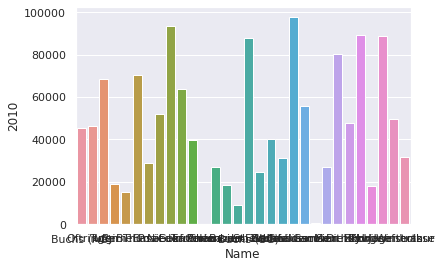

In [ ]:
ax = sns.barplot(kv_electricity['Name'], y = kv_electricity['2010'])




In [ ]:
kv_elect_transp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2010 to 2019
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (Buchs (AG),)          10 non-null     int64
 1   (Oftringen,)           10 non-null     int64
 2   (Turgi,)               10 non-null     int64
 3   (Bern,)                10 non-null     int64
 4   (Biel,)                10 non-null     int64
 5   (Thun,)                10 non-null     int64
 6   (Basel,)               10 non-null     int64
 7   (Posieux,)             10 non-null     int64
 8   (Genf,)                10 non-null     int64
 9   (Niederurnen,)         10 non-null     int64
 10  (Trimmis,)             10 non-null     int64
 11  (Perlen,)              10 non-null     int64
 12  (Colombier ,)          10 non-null     int64
 13  (La Chaux-de-Fonds ,)  10 non-null     int64
 14  (Bazenheid,)           10 non-null     int64
 15  (Buchs (SG),)          10 non-null     int